# Perform initial data transformations for 5G TPM data
1. Log ratio relative to umax
1. Log ratio relative to noCu
1. Box - cox transform

For all of these, we'll use promoter windows of 300bp (no truncation) and we'll optionally skip operon-likely genes (2204 total)

In [1]:
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import random
random.seed(7) #10



import utils as u
import torch_utils as tu

In [2]:
#upstream_region_file = 'all_seq_info/all_loci_upstream_regions_w100_min20.fa'
upstream_region_file = 'all_proms/all_loci_upstream_regions_w300_min20.fa'
op_file = 'all_proms/loci_in_top_100perc.txt'
data_mat_file = 'data/extract_TPM_counts.tsv'
sample2cond_file = 'data/sample2condition.txt'
sample_file = None
condition_file = 'data/conditions_to_include.txt'
coded_meta_file = 'data/5G_exp_metadata_coded.tsv'

COND_COLS = ['carbon_source','oxygen_level','nitrate_level',
             'copper_level','lanthanum_level','growth_rate',
             'growth_mode']


loc2seq, op_leads, tpm_df, sample2condition, samples, conditions, meta_df = u.load_data(
    upstream_region_file,
    op_file,
    data_mat_file, 
    sample2cond_file, 
    sample_file, 
    condition_file,
    coded_meta_file
)

NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNTATTTAAGAAGGTAGCGAAGAGTAAATAGATGATATTATAAAAAAATTATGCCACTATACAGCAATCAAATCAGTGCCGGCATAATTGACATAAACCGGCGTTTATTCTATCATCCCGGATCTTTTTTATCCGTTTTTGTTAACAATCATCTGAACCAGGATTTAAGGC


In [3]:
print('EQU24_RS19310' in op_leads)
print('EQU24_RS19315' in op_leads)

False
True


In [4]:
tpm_df.head()

,locus_tag,product,type,gene_symbol,locus,start_coord,end_coord,note,translation,gene_len,...,5GB1_pA9_red_tpm,5GB1_pA9_yellow_tpm,5GB1C-5G-La-BR1_tpm,5GB1C-5G-La-BR2_tpm,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm
0,EQU24_RS00005,chromosomal replication initiator protein DnaA,CDS,dnaA,NZ_CP035467.1,0,1317,Derived by automated computational analysis us...,MSALWNNCLAKLENEISSSEFSTWIRPLQAIETDGQIKLLAPNRFV...,1318,...,38.557373,38.810668,37.444214,40.246006,40.100118,33.432274,39.880174,38.355431,30.247582,41.248441
1,EQU24_RS00010,DNA polymerase III subunit beta,CDS,,NZ_CP035467.1,1502,2603,Derived by automated computational analysis us...,MKYIINREQLLVPLQQIVSVIEKRQTMPILSNVLMVFRENTLVMTG...,1102,...,52.552767,52.461746,42.676553,49.210083,46.798476,48.142385,45.465136,46.498139,37.152951,52.902410
2,EQU24_RS00015,DNA replication/repair protein RecF,CDS,recF,NZ_CP035467.1,3060,4140,Derived by automated computational analysis us...,MSLQKLDIFNVRNIRQASLQPSPGLNLIYGANASGKSSVLEAIFIL...,1081,...,31.350991,34.914128,21.479309,24.204682,22.171104,22.006566,22.658157,22.753325,19.407103,29.834124
3,EQU24_RS00020,DNA topoisomerase (ATP-hydrolyzing) subunit B,CDS,gyrB,NZ_CP035467.1,4185,6600,Derived by automated computational analysis us...,MSENIKQYDSTNIQVLKGLDAVRKRPGMYIGDTDDGTGLHHMVFEV...,2416,...,74.848501,80.850761,54.959319,64.911376,59.653059,64.648318,69.119079,65.643179,57.590223,68.306759
4,EQU24_RS00025,hypothetical protein,CDS,,NZ_CP035467.1,6825,7062,Derived by automated computational analysis us...,VKTTKYFLTTRMRPDREIIKDEWIQYVVRFPENEHIQFDGRIRRWA...,238,...,50.324948,49.349547,34.539657,36.521074,37.789611,39.358066,38.992158,35.870964,41.462392,40.227192


In [5]:
print(np.mean(tpm_df['5GB1_pA9_red_tpm']))
print(np.mean(tpm_df['5GB1C-5G-La-BR1_tpm']))

237.36055067647783
237.36055067647783


In [6]:
# save locus info separately - easier to use in other files
tpm_df[['locus_tag','gene_symbol','product','type']].to_csv("data/locus2info.tsv",sep='\t',index=False)

In [7]:
locus_info_df = pd.read_csv("data/locus2info.tsv",sep='\t')
locus_info_df

,locus_tag,gene_symbol,product,type
0,EQU24_RS00005,dnaA,chromosomal replication initiator protein DnaA,CDS
1,EQU24_RS00010,NaN,DNA polymerase III subunit beta,CDS
2,EQU24_RS00015,recF,DNA replication/repair protein RecF,CDS
3,EQU24_RS00020,gyrB,DNA topoisomerase (ATP-hydrolyzing) subunit B,CDS
4,EQU24_RS00025,NaN,hypothetical protein,CDS
...,...,...,...,...
4208,EQU24_RS22135,mnmE,tRNA uridine-5-carboxymethylaminomethyl(34) sy...,CDS
4209,EQU24_RS22140,yidC,membrane protein insertase YidC,CDS
4210,EQU24_RS22145,yidD,membrane protein insertion efficiency factor YidD,CDS
4211,EQU24_RS22150,rnpA,ribonuclease P protein component,CDS


In [8]:
locus2info = u.make_info_dict(locus_info_df)
locus2info['EQU24_RS19315']

{'gene': 'pmoC',
 'product': 'methane monooxygenase/ammonia monooxygenase subunit C',
 'type': 'CDS'}

In [9]:
df_means = u.get_gene_means_by_condition(tpm_df,samples,sample2condition)
df_means

locus_tag,exp_condition,EQU24_RS00005,EQU24_RS00010,EQU24_RS00015,EQU24_RS00020,EQU24_RS00025,EQU24_RS00030,EQU24_RS00035,EQU24_RS00040,EQU24_RS00045,...,EQU24_RS22110,EQU24_RS22115,EQU24_RS22120,EQU24_RS22125,EQU24_RS22130,EQU24_RS22135,EQU24_RS22140,EQU24_RS22145,EQU24_RS22150,EQU24_RS22155
0,LanzaTech,25.626702,55.711920,11.804042,76.880335,43.737438,27.940983,35.296053,25.926725,23.461781,...,7420.641716,16.014544,15.947067,16.286482,9.514666,46.013885,354.315359,157.364073,571.458102,613.084675
1,MeOH,23.323155,18.905775,18.443916,18.257805,16.950643,12.367795,43.805536,9.660950,7.292145,...,1298.247682,15.614619,20.198066,25.994364,20.950234,28.709983,93.606437,161.518124,496.980651,280.334047
2,NO3_lowO2_slow_growth,32.040358,43.646760,21.341623,62.257687,41.674925,31.911455,57.839768,16.875694,14.916147,...,6497.858109,26.263485,28.935133,23.515245,26.422667,35.157264,178.986199,164.073806,433.428735,493.885115
3,NoCu,44.338687,59.619360,28.258717,56.808319,49.829406,38.384652,81.520362,40.491969,36.566500,...,8345.775345,43.055124,34.370565,44.409579,34.591933,65.329879,253.598495,273.274694,731.042190,1087.611126
4,NoLanthanum,33.434023,43.679839,23.162675,57.287047,42.357072,41.931657,102.503601,30.216787,19.452312,...,5085.627409,16.413284,35.578138,44.613117,43.191743,21.917260,109.773330,67.267718,211.565175,328.933746
5,WT_control,34.988452,38.272163,15.495930,54.855025,35.396786,26.817623,59.558466,24.797995,27.925137,...,4939.367129,18.248719,21.027514,31.490596,45.810743,36.195898,172.298263,181.468991,403.551659,648.122601
6,WithLanthanum,35.452185,41.782237,20.634554,57.120166,34.248335,46.191637,110.711781,31.803805,19.428086,...,3942.947792,15.962203,34.308829,49.206725,39.990662,21.210809,98.090610,73.106973,194.379586,319.988959
7,aa3_KO,26.849583,45.489035,11.962099,55.846659,33.097353,28.718155,50.249664,21.490715,24.790508,...,5355.094603,16.236806,20.836285,28.298842,40.627394,30.065630,181.790564,153.928317,376.664997,657.228922
8,crotonic_acid,38.684021,52.507256,33.132559,77.849631,49.837247,37.332021,69.675355,32.001867,35.856260,...,8680.904376,42.175374,47.879804,58.961083,43.069352,81.481463,365.899345,315.553709,614.920997,676.638496
9,highCu,47.851477,79.099490,33.524043,73.320408,48.652214,33.976359,92.989818,51.940784,50.360579,...,8132.537467,48.884308,35.598730,46.099300,30.115207,89.700150,342.971435,386.483127,1021.443762,1692.391154


### Check df_means distributions

In [10]:
psuedo_count = 0.01
df_meansT = df_means.set_index("exp_condition").T + psuedo_count

df_meansT.describe()

exp_condition,LanzaTech,MeOH,NO3_lowO2_slow_growth,NoCu,NoLanthanum,WT_control,WithLanthanum,aa3_KO,crotonic_acid,highCu,highO2_slow_growth,lowCH4,lowCu,lowO2_fast_growth,lowO2_slow_growth,medCu,slow_growth,uMax,unknown
count,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000
mean,237.370551,237.370551,237.370551,237.370551,237.370551,237.370551,237.370551,237.370551,237.370551,237.370551,237.370551,237.370551,237.370551,237.370551,237.370551,237.370551,237.370551,237.370551,237.370551
std,3608.970762,8690.903942,3200.972660,2880.613041,3294.148756,3681.469132,3805.692304,3237.680883,3614.516314,2762.759501,3162.518375,4474.110220,2968.420641,3749.246526,7318.594948,2974.240143,3018.507121,3012.711208,5629.014009
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,15.719226,12.874708,21.188686,23.897276,28.564778,16.924923,27.018283,16.549403,25.038086,20.324120,31.321068,16.090631,21.976081,18.953623,8.962131,19.667436,18.388176,22.618816,16.357295
50%,36.887427,24.519181,45.035245,52.601061,57.446726,36.371229,55.540646,37.144976,55.721700,48.930729,66.277208,35.986272,48.932548,42.156544,18.713624,44.930841,40.188854,52.130286,33.022486
75%,85.671517,47.365154,94.104792,110.339945,114.436447,77.224832,113.447005,84.964352,116.662096,104.765223,136.511393,76.215181,105.606732,86.985434,39.979111,98.587537,89.289435,107.503077,66.810771
max,179996.873952,534996.530265,160891.758758,169237.828591,175153.392813,194488.697960,219871.115041,159144.094941,211862.680278,153361.831049,193875.490781,239995.600807,176867.906910,205534.816632,343809.711378,170727.490805,113408.855552,168221.009211,259438.757124


In [11]:
# check a quick boxplot of mean tpm data
df_meansT_melt = pd.melt(df_meansT.reset_index(), id_vars=['locus_tag'],var_name="exp_condition",value_name='tpm')
df_meansT_melt

,locus_tag,exp_condition,tpm
0,EQU24_RS00005,LanzaTech,25.636702
1,EQU24_RS00010,LanzaTech,55.721920
2,EQU24_RS00015,LanzaTech,11.814042
3,EQU24_RS00020,LanzaTech,76.890335
4,EQU24_RS00025,LanzaTech,43.747438
...,...,...,...
80042,EQU24_RS22135,unknown,31.295152
80043,EQU24_RS22140,unknown,114.118228
80044,EQU24_RS22145,unknown,119.781566
80045,EQU24_RS22150,unknown,344.152066


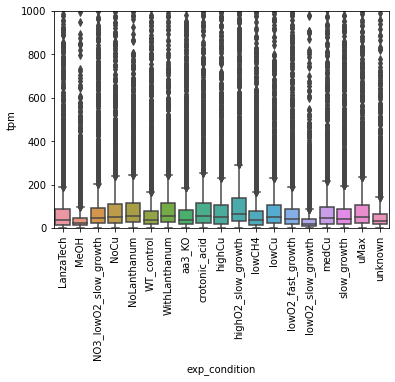

In [12]:
sns.boxplot(data=df_meansT_melt,x="exp_condition",y="tpm")
plt.ylim(-1,1000)
plt.xticks(rotation=90)
plt.show()

### Make log ratio versions of df

In [13]:
lr_umax = u.make_lr_df(df_meansT, 'uMax')
lr_nocu = u.make_lr_df(df_meansT, 'NoCu')

In [14]:
# spot check log calculation
df_meansT[["highCu","medCu","lowCu","NoCu","uMax"]]

exp_condition,highCu,medCu,lowCu,NoCu,uMax
locus_tag,,,,,
EQU24_RS00005,47.861477,44.920897,42.973556,44.348687,52.045884
EQU24_RS00010,79.109490,65.011074,61.209155,59.629360,59.991257
EQU24_RS00015,33.534043,29.419165,28.828713,28.268717,33.943076
EQU24_RS00020,73.330408,65.393162,61.573321,56.818319,71.052489
EQU24_RS00025,48.662214,48.729958,50.966799,49.839406,48.648085
...,...,...,...,...,...
EQU24_RS22135,89.710150,84.626668,66.743497,65.339879,89.974638
EQU24_RS22140,342.981435,340.031564,293.599291,253.608495,431.225393
EQU24_RS22145,386.493127,377.219038,313.741841,273.284694,449.945881


In [15]:
print(np.log2(47.861477/52.045884))
lr_umax[["highCu","medCu","lowCu","NoCu","uMax"]]

-0.12091915487340911


,highCu,medCu,lowCu,NoCu,uMax
locus_tag,,,,,
EQU24_RS00005,-0.120919,-0.212397,-0.276335,-0.230893,0.0
EQU24_RS00010,0.399099,0.115933,0.028995,-0.008729,0.0
EQU24_RS00015,-0.017491,-0.206361,-0.235611,-0.263911,0.0
EQU24_RS00020,0.045526,-0.119745,-0.206580,-0.322529,0.0
EQU24_RS00025,0.000419,0.002426,0.067175,0.034904,0.0
...,...,...,...,...,...
EQU24_RS22135,-0.004247,-0.088406,-0.430891,-0.461555,0.0
EQU24_RS22140,-0.330312,-0.342773,-0.554594,-0.765839,0.0
EQU24_RS22145,-0.219309,-0.254349,-0.520174,-0.719347,0.0


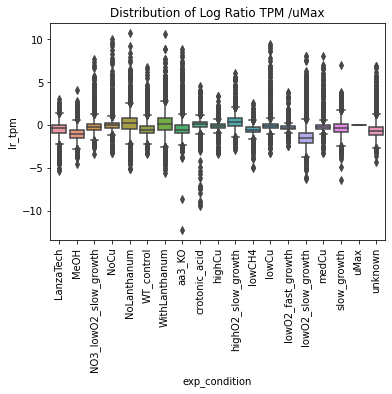

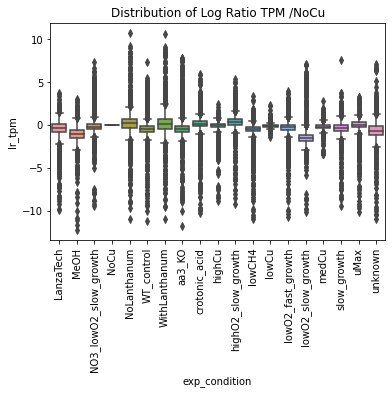

In [16]:
# check distribution of log ratio/uMax
def check_dist_of_lr_df(lr_df,name):
    lr_df_melt = pd.melt(lr_df.reset_index(), id_vars=['locus_tag'],var_name="exp_condition",value_name='lr_tpm')

    sns.boxplot(data=lr_df_melt,x="exp_condition",y="lr_tpm")
    #plt.ylim(-1,1000)
    plt.xticks(rotation=90)
    plt.title(f"Distribution of Log Ratio TPM /{name}")
    plt.show()
    
check_dist_of_lr_df(lr_umax,'uMax')
check_dist_of_lr_df(lr_nocu,'NoCu')

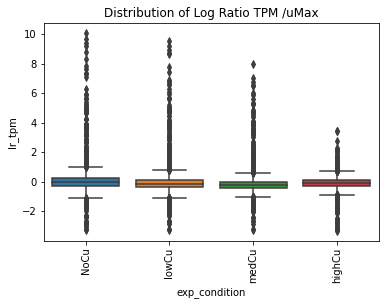

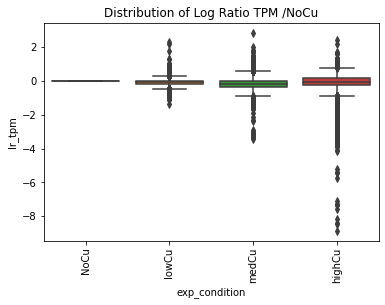

In [17]:
cu_conds = ['NoCu','lowCu','medCu','highCu']
check_dist_of_lr_df(lr_umax[cu_conds],'uMax')
check_dist_of_lr_df(lr_nocu[cu_conds],'NoCu')


## Save data frames

In [18]:
XY_umax = u.make_XY_df(lr_umax, conditions, loc2seq, op_leads)
XY_nocu = u.make_XY_df(lr_nocu, conditions, loc2seq, op_leads)

In [19]:
XY_umax

,og_index,locus_tag,upstream_region,uMax,lowO2_fast_growth,lowCH4,MeOH,NoCu,medCu,highCu,lowCu,highO2_slow_growth,NO3_lowO2_slow_growth,WithLanthanum,NoLanthanum
0,0,EQU24_RS00005,ACTGTTAGCTTGGCACGGCCCTTGGCTCTGCGGGCGTTAAGGACTT...,0.0,-0.542398,-0.755480,-1.157403,-0.230893,-0.212397,-0.120919,-0.276335,0.315865,-0.699444,-0.553503,-0.638036
1,1,EQU24_RS00010,GTGGACGCGATCACACCACGGTTATTAATGCTTGTAAACGCATTGC...,0.0,-0.475089,-0.839191,-1.665162,-0.008729,0.115933,0.399099,0.028995,0.722720,-0.458547,-0.521517,-0.457454
2,2,EQU24_RS00015,TTGCGAAGAGGGGCGGTTTCTCGTCCGACAGGCGTCGGCGGCAAGG...,0.0,-0.312854,-0.876282,-0.879190,-0.263911,-0.206361,-0.017491,-0.235611,0.402193,-0.668772,-0.717356,-0.550693
3,4,EQU24_RS00025,GATGGGCGACATCGTCGAACCGCGCCGGGATTTCATCGTCAAGAAT...,0.0,-0.539808,-0.620474,-1.520192,0.034904,0.002426,0.000419,0.067175,0.678171,-0.222857,-0.505928,-0.199440
4,11,EQU24_RS00060,GAATTTTCGGGTTCGGGCATCAGCTACCGGGTATCGCCGGTACTCG...,0.0,0.001016,-1.077748,-1.343901,-0.002609,-0.078647,0.092409,-0.067553,-0.479305,-0.240977,0.265585,0.337004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,4203,EQU24_RS22110,GAAGACTGCTCGGTTTGCTGTTCTCCTATTTACGTACAAATCGAAG...,0.0,0.157759,-0.200348,-2.726296,-0.041825,-0.533827,-0.079165,-0.263448,-1.308527,-0.402906,-1.123595,-0.756444
2200,4204,EQU24_RS22115,AGCGCACCGCTATCGCTCTGGCTTAGATATCAAATCATTCGGCTAA...,0.0,-0.692357,-1.246394,-1.478896,-0.016197,0.013280,0.166949,-0.005485,-0.103059,-0.729110,-1.447154,-1.406975
2201,4206,EQU24_RS22125,ACTGGTACGACAGCGAAACAATTTTAAAGAAATAGCACGACACGTT...,0.0,-0.530410,-1.186861,-0.824715,-0.052273,-0.396374,0.001589,-0.320915,-0.310515,-0.969259,0.095680,-0.045678
2202,4207,EQU24_RS22130,GAAAATAACCCGCGAATTAACACCAAACCGAGACCCAAACAACAAA...,0.0,-0.384774,-0.660985,-0.573066,0.150132,0.077680,-0.049750,0.032826,0.293011,-0.238399,0.359303,0.470368


In [20]:
XY_umax_noOpFilt = u.make_XY_df(lr_umax, conditions, loc2seq, op_leads, op_filt=False)
XY_nocu_noOpFilt = u.make_XY_df(lr_nocu, conditions, loc2seq, op_leads, op_filt=False)

In [21]:
XY_umax_noOpFilt

,og_index,locus_tag,upstream_region,uMax,lowO2_fast_growth,lowCH4,MeOH,NoCu,medCu,highCu,lowCu,highO2_slow_growth,NO3_lowO2_slow_growth,WithLanthanum,NoLanthanum
0,0,EQU24_RS00005,ACTGTTAGCTTGGCACGGCCCTTGGCTCTGCGGGCGTTAAGGACTT...,0.0,-0.542398,-0.755480,-1.157403,-0.230893,-0.212397,-0.120919,-0.276335,0.315865,-0.699444,-0.553503,-0.638036
1,1,EQU24_RS00010,GTGGACGCGATCACACCACGGTTATTAATGCTTGTAAACGCATTGC...,0.0,-0.475089,-0.839191,-1.665162,-0.008729,0.115933,0.399099,0.028995,0.722720,-0.458547,-0.521517,-0.457454
2,2,EQU24_RS00015,TTGCGAAGAGGGGCGGTTTCTCGTCCGACAGGCGTCGGCGGCAAGG...,0.0,-0.312854,-0.876282,-0.879190,-0.263911,-0.206361,-0.017491,-0.235611,0.402193,-0.668772,-0.717356,-0.550693
3,3,EQU24_RS00020,ATTGTTAGTTCTATGTTTAAAGCTTGCGCAAGTACAATTATTGTCG...,0.0,-0.536808,-0.725769,-1.959582,-0.322529,-0.119745,0.045526,-0.206580,0.152926,-0.190402,-0.314632,-0.310424
4,4,EQU24_RS00025,GATGGGCGACATCGTCGAACCGCGCCGGGATTTCATCGTCAAGAAT...,0.0,-0.539808,-0.620474,-1.520192,0.034904,0.002426,0.000419,0.067175,0.678171,-0.222857,-0.505928,-0.199440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,4208,EQU24_RS22135,GAAACCGTTGAATTGCGTCAAGCTCCGTTTGCCTTGTGGATGCAGG...,0.0,-0.317361,-0.575020,-1.647463,-0.461555,-0.088406,-0.004247,-0.430891,-0.790083,-1.355285,-2.084039,-2.036793
4209,4209,EQU24_RS22140,AAAGATGCACTCAATGCATCACCGGAACAATTACAAAAGTCATTGG...,0.0,-0.368451,-0.926327,-2.203608,-0.765839,-0.342773,-0.330312,-0.554594,-0.969649,-1.268513,-2.136108,-1.973783
4210,4210,EQU24_RS22145,CTTCTGAATATAAAAAAGTCTTTACCGGACCGGTAAAATCGAGTGA...,0.0,-0.257051,-0.599146,-1.477966,-0.719347,-0.254349,-0.219309,-0.520174,-0.882049,-1.455319,-2.621473,-2.741551
4211,4211,EQU24_RS22150,AAGGTAGCGAAGAGTAAATAGATGATATTATAAAAAAATTATGCCA...,0.0,-0.144392,-0.574058,-1.389524,-0.832769,-0.296682,-0.350191,-0.626172,-1.365239,-1.586915,-2.743792,-2.621573


In [34]:
# save
XY_umax.to_csv("data/XY_lr_uMax_opFilt.tsv",sep='\t',index=False)
XY_nocu.to_csv("data/XY_lr_noCu_opFilt.tsv",sep='\t',index=False)

XY_umax_noOpFilt.to_csv("data/XY_lr_uMax.tsv",sep='\t',index=False)
XY_nocu_noOpFilt.to_csv("data/XY_lr_noCu.tsv",sep='\t',index=False)

## Raw TPM

In [106]:
XY_tpm = u.make_XY_df(df_meansT, conditions, loc2seq, op_leads, op_filt=True)
XY_tpm_noOpFilt = u.make_XY_df(df_meansT, conditions, loc2seq, op_leads, op_filt=False)

XY_tpm.to_csv("data/XY_TPM_opFilt.tsv",sep='\t',index=False)
XY_tpm_noOpFilt.to_csv("data/XY_TPM.tsv",sep='\t',index=False)

## Log TPM

In [104]:
log_df_meansT = np.log2(df_meansT)
XY_log = u.make_XY_df(log_df_meansT, conditions, loc2seq, op_leads, op_filt=True)
XY_log_noOpFilt = u.make_XY_df(log_df_meansT, conditions, loc2seq, op_leads, op_filt=False)

XY_log.to_csv("data/XY_logTPM_opFilt.tsv",sep='\t',index=False)
XY_log_noOpFilt.to_csv("data/XY_logTPM.tsv",sep='\t',index=False)

## Box-Cox

In [22]:
from scipy import stats

In [28]:
# do box cox calculation for highcu
hc = df_meansT['highCu'].values
hcbc = stats.boxcox(hc)

In [48]:
# log ratio highCu/noCu
hclr = lr_nocu['highCu'].values
# log highCu
lhc = np.log2(hc)

In [31]:
hcbc[0]

array([ 4.67722252,  5.42129596,  4.17159322, ...,  8.01797119,
        9.81394419, 10.81474853])

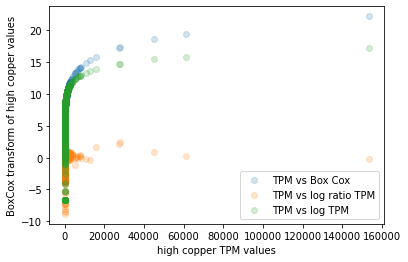

In [49]:
plt.scatter(hc, hcbc[0],alpha = 0.2,label='TPM vs Box Cox')
plt.scatter(hc, hcl,alpha = 0.2,label='TPM vs log ratio TPM')
plt.scatter(hc, lhc,alpha = 0.2,label='TPM vs log TPM')
plt.xlabel("high copper TPM values")
plt.ylabel("BoxCox transform of high copper values")
plt.legend()
#plt.xscale('log')
plt.show()

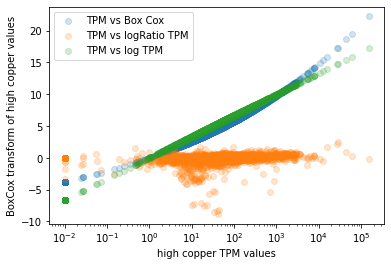

In [50]:
plt.scatter(hc, hcbc[0],alpha = 0.2,label='TPM vs Box Cox')
plt.scatter(hc, hcl,alpha = 0.2,label='TPM vs logRatio TPM')
plt.scatter(hc, lhc,alpha = 0.2,label='TPM vs log TPM')
plt.xlabel("high copper TPM values")
plt.ylabel("BoxCox transform of high copper values")
plt.legend()
plt.xscale('log')
plt.show()

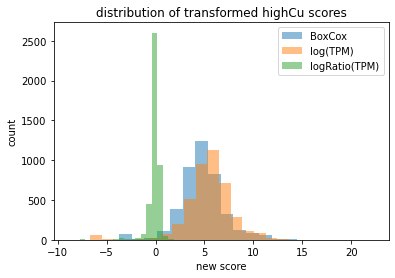

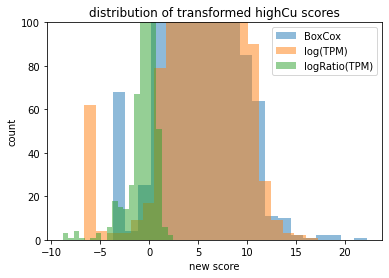

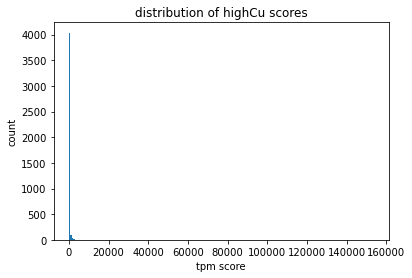

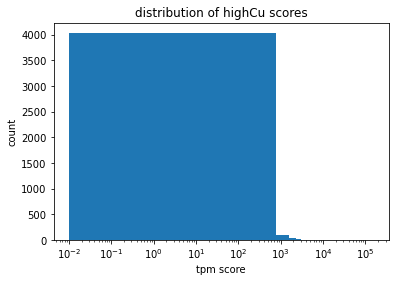

In [101]:
plt.hist(hcbc[0],bins=20,label='BoxCox',alpha=0.5)
plt.hist(lhc,bins=20,label="log(TPM)",alpha=0.5)
plt.hist(hcl,bins=20,label="logRatio(TPM)",alpha=0.5)
plt.title("distribution of transformed highCu scores")
plt.xlabel("new score")
plt.ylabel('count')
plt.legend()
plt.show()

plt.hist(hcbc[0],bins=20,label='BoxCox',alpha=0.5)
plt.hist(lhc,bins=20,label="log(TPM)",alpha=0.5)
plt.hist(hcl,bins=20,label="logRatio(TPM)",alpha=0.5)
plt.title("distribution of transformed highCu scores")
plt.xlabel("new score")
plt.ylabel('count')
plt.ylim(0,100)
plt.legend()
plt.show()


plt.hist(hc,bins=200)
plt.title("distribution of highCu scores")
plt.xlabel("tpm score")
plt.ylabel('count')
plt.show()

plt.hist(hc,bins=200)
plt.title("distribution of highCu scores")
plt.xlabel("tpm score")
plt.ylabel('count')
plt.xscale('log')
plt.show()

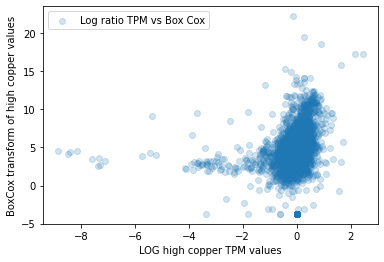

In [51]:
plt.scatter(hcl, hcbc[0],alpha = 0.2,label='Log ratio TPM vs Box Cox')
plt.xlabel("LOG high copper TPM values")
plt.ylabel("BoxCox transform of high copper values")
plt.legend()
#plt.xscale('log')
plt.show()

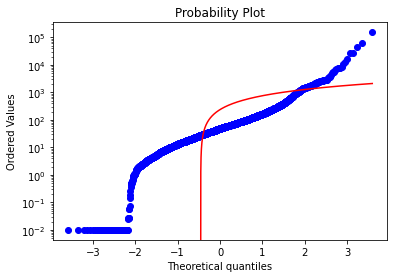

In [38]:
stats.probplot(hc,plot=plt)
plt.yscale('log')

In [68]:
list(XY_log['highCu'].values) == list(log_df_meansT['highCu'].values)

True

In [107]:
# make box cox df
bcdf = pd.DataFrame()
bcdf['locus_tag'] = df_meansT.reset_index()['locus_tag']

for cond in conditions:
    bc_vals,other = stats.boxcox(df_meansT[cond].values)
    print(cond, other)
    bcdf[cond] = bc_vals

uMax 0.0970115023912469
lowO2_fast_growth 0.08861765973986864
lowCH4 0.09053971268925373
MeOH 0.09415625761312306
NoCu 0.10098536231261043
medCu 0.08749184170110436
highCu 0.09525384396045285
lowCu 0.09429732240617839
highO2_slow_growth 0.11955376005992231
NO3_lowO2_slow_growth 0.08845661192546171
WithLanthanum 0.08033483027403258
NoLanthanum 0.08280728283082928


In [108]:
list(bcdf['highCu'].values) == list(hcbc[0])

True

In [109]:
XY_bc = u.make_XY_df(bcdf, conditions, loc2seq, op_leads, op_filt=True)
XY_bc_noOpFilt = u.make_XY_df(bcdf, conditions, loc2seq, op_leads, op_filt=False)

In [110]:
XY_bc.to_csv("data/XY_bc_opFilt.tsv",sep='\t',index=False)
XY_bc_noOpFilt.to_csv("data/XY_bc.tsv",sep='\t',index=False)

In [115]:
list(XY_bc_noOpFilt['highCu'].values) == list(hcbc[0])

True